In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
processor=DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model=DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

In [28]:
cat='/content/drive/My Drive/Clip tokenization dataset/cat.jpg'
img=Image.open(cat)
print(img.size)

(259, 194)


In [29]:
input=processor(images=img,return_tensors="pt")

In [30]:
with torch.no_grad():
  output = model(**input)

In [34]:
rev_img=img.size[::-1]
target_size=torch.tensor([rev_img])
print(target_size)

# This line reverses the image size to (height, width) because the model expects it in that order.
# It wraps the size in a list to represent a batch of one image.
# Then it converts it to a PyTorch tensor for use in post-processing bounding boxes.

tensor([[194, 259]])


In [35]:
raw_results=processor.post_process_object_detection(output,target_sizes=target_size,threshold=0.86)
print(raw_results)

# post_process_object_detection expects target_sizes to be a 2D tensor of shape [batch_size, 2], where each row is [height, width].

[{'scores': tensor([0.8692]), 'labels': tensor([17]), 'boxes': tensor([[-6.2445e-02,  1.3924e+00,  2.5893e+02,  1.8257e+02]])}]


In [37]:
results=raw_results[0]
print(results)

{'scores': tensor([0.8692]), 'labels': tensor([17]), 'boxes': tensor([[-6.2445e-02,  1.3924e+00,  2.5893e+02,  1.8257e+02]])}


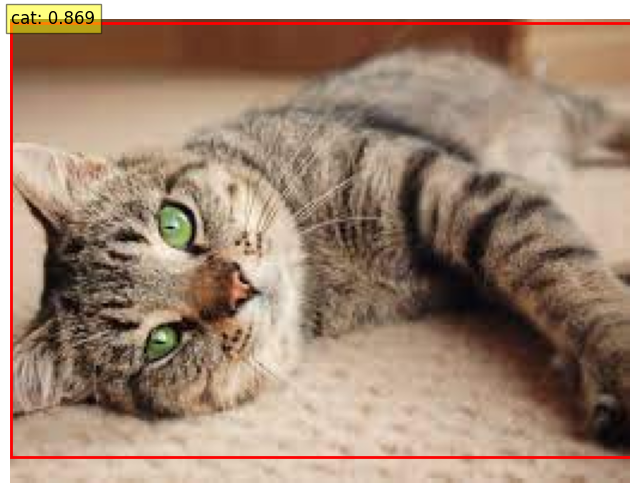

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(img)
ax = plt.gca()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, w, h = box
    ax.add_patch(patches.Rectangle((x, y), w-x, h-y, fill=False, color='red', linewidth=2))
    ax.text(x, y, f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}",
            fontsize=12, bbox=dict(facecolor="yellow", alpha=0.5))

plt.axis("off")
plt.show()